# Информация

Данная работа является частью одного проекта UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. 


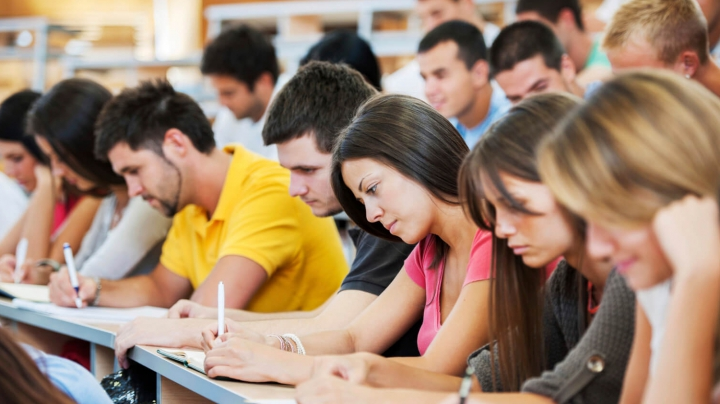

## Описание датасета

Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

## Получение данных и импорт библиотек

In [1]:
from scipy.stats import ttest_ind
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(stud.head(7))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0


По отчету видно,что датасет имеет пропущенные значения (NaN), которые нам нужно будет обработать (удалить или заполнить). А также мы видим столбец "studytime, granular", которого нет в описании. 

In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В следующем отчете мы видим, что количество нулевых значений невысокое - не более 12% (наименьшее значение ненулеых значений 350 - у колонки pstatus).

По типам значений в столбцах имеем:

- столбцы с категориальными значениями: 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',         'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health'
- столбцы с числовыми значениями: 'age', 'absences', 'score'

Также заметно, что некоторые категориальные столбцы имеют тип данных float64. И только возраст 'age' имеет тип данных int64. 

# Первичный анализ данных

Для удобства использования pandas переименуем некоторые столбцы:

In [4]:
stud.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob',
                     'studytime, granular': 'enigmatic'
                     }, inplace=True)

Столбец 'studytime, granular' на данном этапе не будем удлять. Мы его просто переименовали в 'enigmatic' (загадочный), вдруг его данные будут иметь большое значение для исследования.

## Рассмотрим данные в столбцах

In [5]:
def about_column(column):
    print(stud[column].name, '\n')
    print(stud[column].value_counts())
    print('Уникальные значения столбца', ': ', pd.unique(stud[col]))
    print('Уникальных значений:', stud[column].nunique())
    print('Количество пустых значений: ', stud[col].isna().sum())
    print('Процент пустых значений: ', round(
        stud[col].isna().sum()/395*100, 2), '\n\n')

In [6]:
# Список столбцов с категориальными значениями
category_col = ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'enigmatic', 'higher', 'internet', 'romantic', 'famrel',
                'freetime', 'goout', 'health']

In [7]:
for col in category_col:
    about_column(col)

school 

GP    349
MS     46
Name: school, dtype: int64
Уникальные значения столбца :  ['GP' 'MS']
Уникальных значений: 2
Количество пустых значений:  0
Процент пустых значений:  0.0 


sex 

F    208
M    187
Name: sex, dtype: int64
Уникальные значения столбца :  ['F' 'M']
Уникальных значений: 2
Количество пустых значений:  0
Процент пустых значений:  0.0 


address 

U    295
R     83
Name: address, dtype: int64
Уникальные значения столбца :  ['U' nan 'R']
Уникальных значений: 2
Количество пустых значений:  17
Процент пустых значений:  4.3 


famsize 

GT3    261
LE3    107
Name: famsize, dtype: int64
Уникальные значения столбца :  [nan 'GT3' 'LE3']
Уникальных значений: 2
Количество пустых значений:  27
Процент пустых значений:  6.84 


pstatus 

T    314
A     36
Name: pstatus, dtype: int64
Уникальные значения столбца :  ['A' nan 'T']
Уникальных значений: 2
Количество пустых значений:  45
Процент пустых значений:  11.39 


medu 

4.0    131
2.0    102
3.0     97
1.0     59
0.0      

In [8]:
# Список столбцов с числовыми значениями
num_col = ['age', 'absences', 'score']

In [9]:
def about_num_column(column):
    print(stud[column].name, '\n')
    print('Количество пустых значений: ', stud[col].isna().sum())
    print('Процент пустых значений: ', round(
        stud[col].isna().sum()/395*100, 2), '\n\n')


for col in num_col:
    about_num_column(col)

age 

Количество пустых значений:  0
Процент пустых значений:  0.0 


absences 

Количество пустых значений:  12
Процент пустых значений:  3.04 


score 

Количество пустых значений:  6
Процент пустых значений:  1.52 




Здесь мы видим: 

- отсутствующие значения (nan) существуют во всех колонках, кроме первых трех (school, sex, age)
- в столбце fedu есть значение 40, по описанию датасета в нем могут быть значения от 0 до 4. Принимаем это значение за опечатку.
- в стобце famrel есть значение -1, по описанию датасета в нем могут быть значения от 1 до 5. Также принимаем это значение за опечатку.
- каждый столбец имеет небольшое число уникальных значений, а также процент пропусков тоже небольшой, поэтому пропуски в столбцах будем заменять на "Моду".

Сначала заменим отсутствующие значения во всех колонках кроме: 'score', 'school', 'sex', 'age'. 

In [10]:
# список с колонками, в которых будем заменять нулевые значения
col_null = ['address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'enigmatic', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health', 'absences']

In [11]:
def replace_col(col):
    stud[col] = stud[col].replace(np.NaN, stud[col].mode()[0])


for column in col_null:
    replace_col(column)

Строки с отсутствующими значениями в целевой колонке 'score' удалим, так как весь анализ мы можем проводить только относительно существующих значений.

In [12]:
stud = stud.dropna(axis='index', how='any', subset=['score'])

В столбце fedu заменим значение 40 на 4

In [13]:
stud['fedu'] = stud['fedu'].replace(40.0, 4.0)

В столбце famrel заменим значение '-1' на '1'

In [14]:
stud['famrel'] = stud['famrel'].replace(-1.0, 1.0)

## Рассмотрим столбцы с числовыми значениями

### age

Посмотрим на распределение этого признака

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

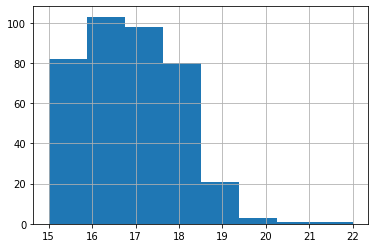

In [15]:
stud.age.hist(bins=8)
stud.age.describe()

Как видно, у этого признака хорошее распределение (со смещением вправо), выбросов нет. 

### absences

Посмотрим на распределение этого признака

count    389.000000
mean       7.113111
std       23.310047
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

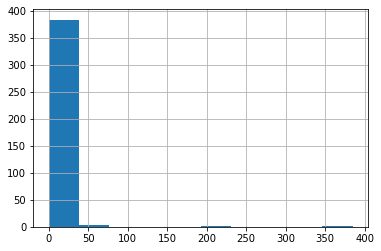

In [16]:
stud.absences.hist()
stud.absences.describe()

In [17]:
stud.absences

0        6.0
1        4.0
2       10.0
3        2.0
4        4.0
       ...  
390    212.0
391      3.0
392      3.0
393      0.0
394      5.0
Name: absences, Length: 389, dtype: float64

Похоже, что данный столбец имеет выбросы. Воспользуемся формулой межквартильного размаха для определения выбросов.

In [18]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Отрицательных значений в этом столбце нет. Поэтому отфильтруем только по второй границе, то есть значения больше 20.

In [19]:
stud = stud[stud['absences'] <= 20]

Снова отобразим гистограмму:

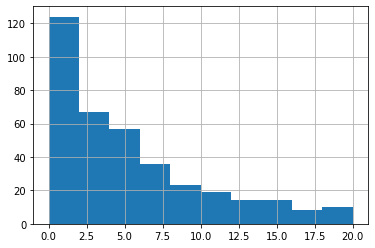

In [20]:
stud.absences.hist()

Теперь видим распределение смещенное вправо.

### score

Этот столбец очень важен для нас. Посмотрим на данные:

In [21]:
stud.score

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
389     0.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 372, dtype: float64

Посмотрим на распределение этого признака

count    372.000000
mean      52.231183
std       23.072493
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

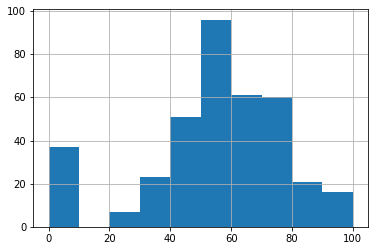

In [22]:
stud.score.hist()
stud.score.describe()

Распределение имеет разрыв, однако относительно этих данных строится исследование, а также такие случаи, где ученик пришел на экзамен - но не заполнил или не решил ни одного задания (нулевые баллы), тоже возможны. Поэтому оставляем данные - как есть.

## Проверим как очистились наши данные

Выведем уникальные значения всех столбцов:

In [23]:
for column in stud:
    print('Уникальные значения столбца', column, ': ', pd.unique(stud[column]))

Уникальные значения столбца school :  ['GP' 'MS']
Уникальные значения столбца sex :  ['F' 'M']
Уникальные значения столбца age :  [18 17 15 16 19 22 20 21]
Уникальные значения столбца address :  ['U' 'R']
Уникальные значения столбца famsize :  ['GT3' 'LE3']
Уникальные значения столбца pstatus :  ['A' 'T']
Уникальные значения столбца medu :  [4. 1. 3. 2. 0.]
Уникальные значения столбца fedu :  [4. 1. 2. 3. 0.]
Уникальные значения столбца mjob :  ['at_home' 'health' 'other' 'services' 'teacher']
Уникальные значения столбца fjob :  ['teacher' 'other' 'health' 'services' 'at_home']
Уникальные значения столбца reason :  ['course' 'other' 'home' 'reputation']
Уникальные значения столбца guardian :  ['mother' 'father' 'other']
Уникальные значения столбца traveltime :  [2. 1. 3. 4.]
Уникальные значения столбца studytime :  [2. 3. 1. 4.]
Уникальные значения столбца failures :  [0. 3. 2. 1.]
Уникальные значения столбца schoolsup :  ['yes' 'no']
Уникальные значения столбца famsup :  ['no' 'yes']


Видим, что данные в порядке.

# Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой по математике на госэкзамене.

Корреляции рассматриваем только для числовых столбцов. 

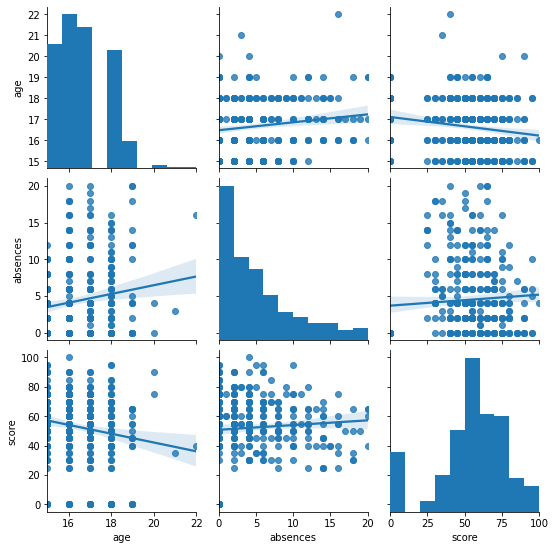

In [24]:
stud_loc = stud[['age', 'absences', 'score']]
sns.pairplot(stud_loc, kind='reg')

Построим тепловую карту для наших числовых признаков.

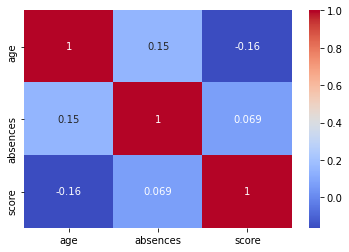

In [25]:
sns.heatmap(stud_loc.corr(), annot=True, cmap='coolwarm')

Видим, что признаки 'age', 'absences' слабо коррелируют cо 'score', а также между собой. Поэтому 'age' и 'absences' оставляем для применения в модели.

# Анализ номинативных переменных

Посмотрим, различаются ли распределения оценок 'score' в зависимости от значений номинативных переменных. Сделаем это с помощью графиков box-plot.

In [27]:
def get_boxplot(column, size_a, size_b):
    fig, ax = plt.subplots(figsize=(size_a, size_b))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Отобразим сначала графики с наименьшим количеством уникальных значений:

In [28]:
min_col = ['school', 'sex', 'address', 'famsize', 'pstatus',
           'schoolsup', 'famsup', 'paid', 'activities',
           'nursery', 'higher', 'internet', 'romantic',
           ]

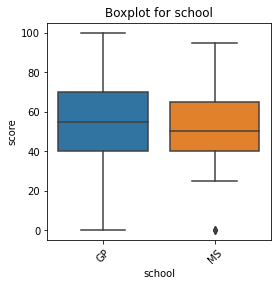

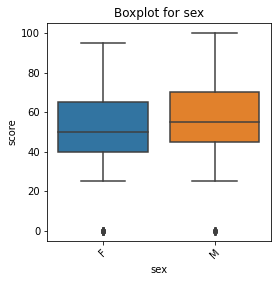

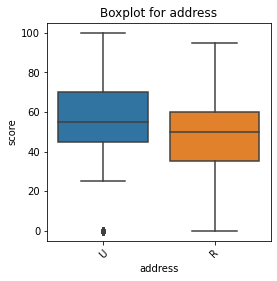

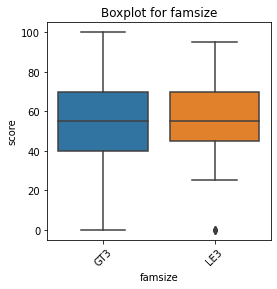

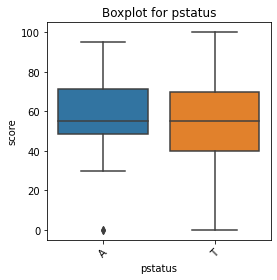

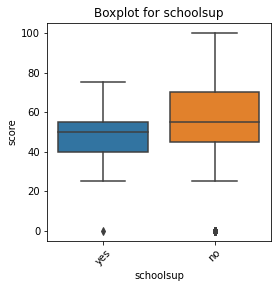

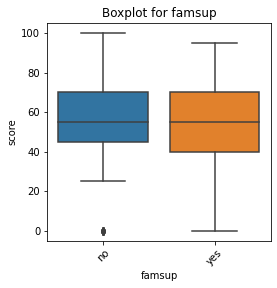

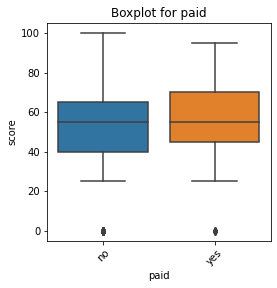

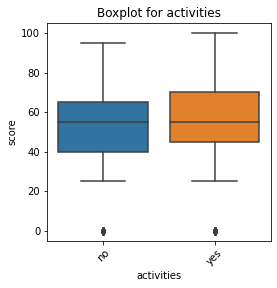

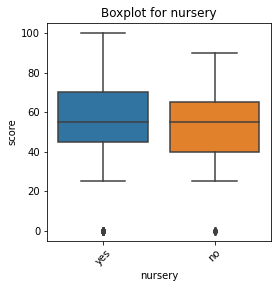

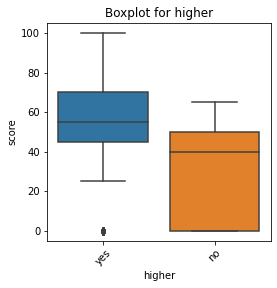

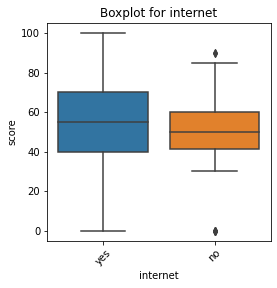

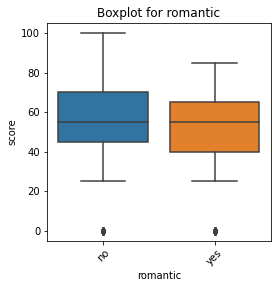

In [29]:
for col_n in min_col:
    get_boxplot(col_n, 4, 4)

Отобразим остальные графики с номинативными переменными:

In [30]:
max_col = ['medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
           'traveltime', 'studytime', 'failures', 'enigmatic', 'famrel',
           'freetime', 'goout', 'health']

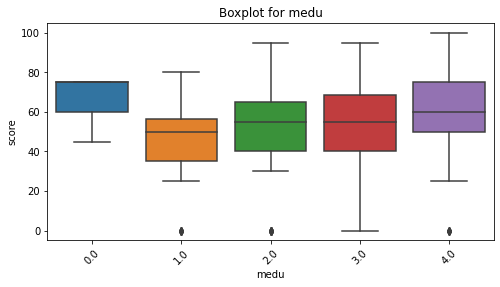

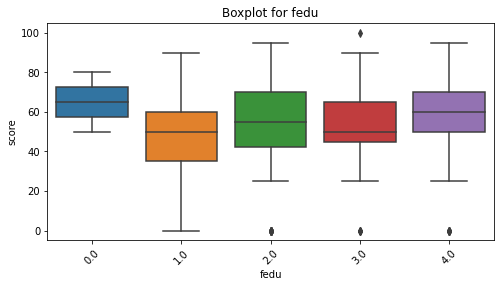

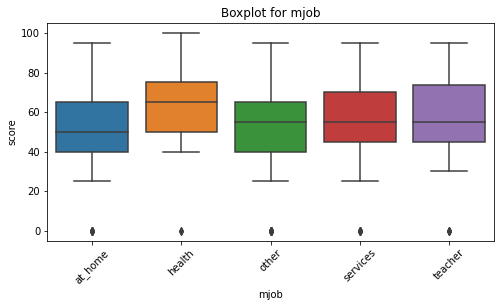

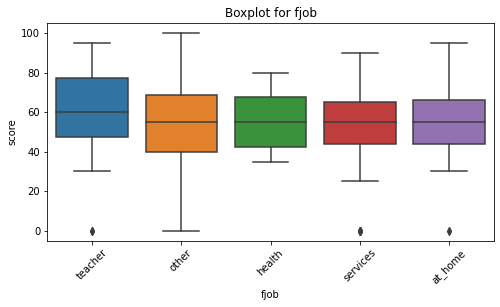

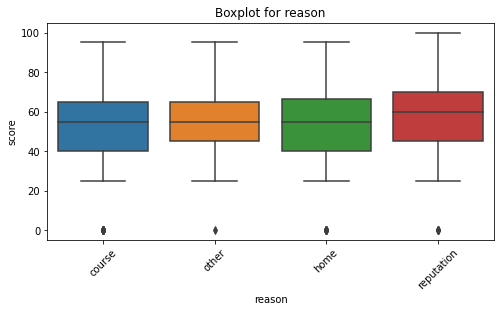

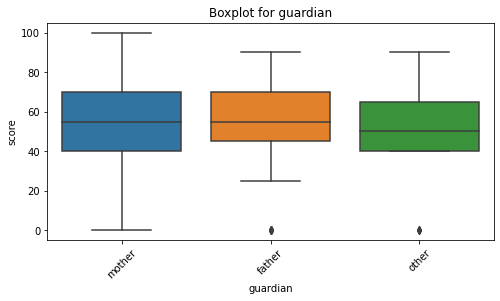

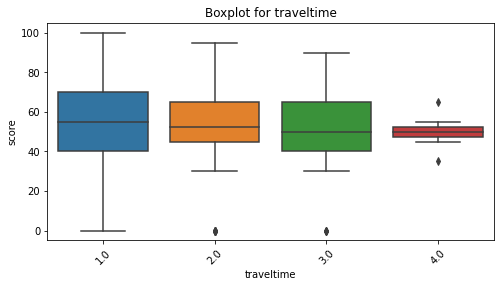

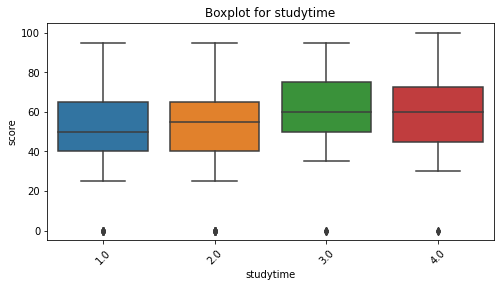

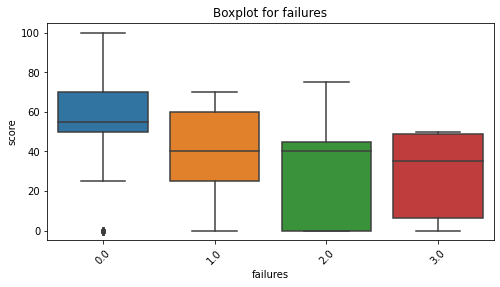

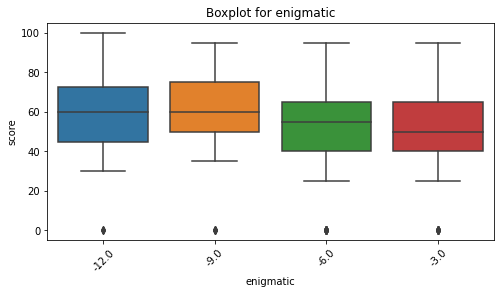

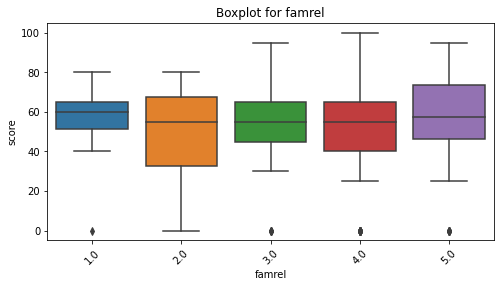

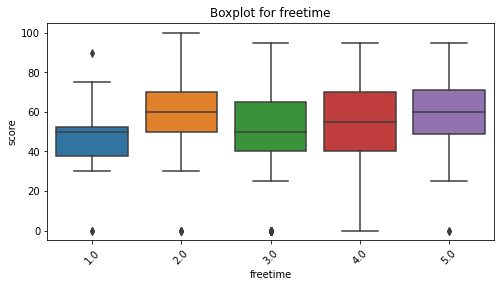

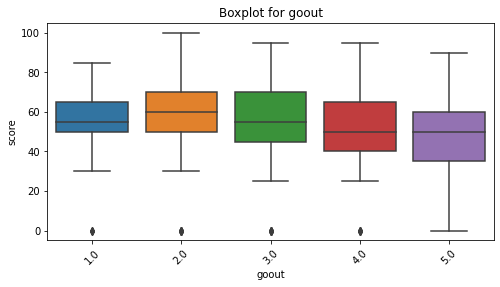

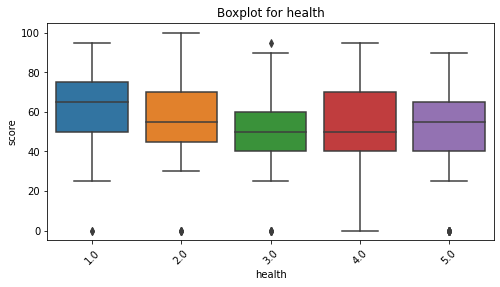

In [31]:
for col_n in max_col:
    get_boxplot(col_n, 8, 4)

Из первого набора графиков можно отметить наиболее влияющие на величину score - это: sex, address, schollsup и higher. То есть пол, адресс проживания, дополнительная школьная поддержка и желание получить высшее образование. В этом есть логика.

Из второго набора графиков наиболее влияющие на величину score: medu, fedu, mjob, fjob, traveltime, failures, famrel, freetime, goout, health.

Также отметим, что лишний столбец, который мы назвали загадочным 'enigmatic', не похоже, что влияет на 'score'.

В целом, получилось, что достаточно большое количество параметров могут влиять на оценку по математике. Однако наши рассуждения могут оказаться слишком субъективными. 

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [32]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in category_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются 8 параметров: sex, address, medu, mjob, failures, paid, higher, romantic. 

Оставим эти переменные в датасете для дальнейшего построения модели. 

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: sex, address, medu, mjob, failures, paid, higher, romantic, age, absences.

In [33]:
stud_for_model = stud.loc[:, ['sex', 'address', 'medu', 'mjob',
                              'failures', 'paid', 'higher', 'romantic', 'age', 'absences']]
stud_for_model.head()

,sex,address,medu,mjob,failures,paid,higher,romantic,age,absences
0,F,U,4.0,at_home,0.0,no,yes,no,18,6.0
1,F,U,1.0,at_home,0.0,no,yes,no,17,4.0
2,F,U,1.0,at_home,3.0,no,yes,no,15,10.0
3,F,U,4.0,health,0.0,yes,yes,yes,15,2.0
4,F,U,3.0,other,0.0,yes,yes,no,16,4.0


# Выводы

В результате разведывательного анализа данных влияния параметров на оценку учеников по математике  были получены следующие выводы:

- В данных достаточно мало пустых значений, максимум 11.4% от значений в столбце. 

- Выбросы были найдены в столбце absences (количество пропущенных занятий). Также были найдены нетипичные значения в столбцах fedu и famrel, которые мы приняли за опечатки при заполнении анкет. 

- Распределение целевой переменной разделена на две части, но мы оставили данные как есть, чтобы исследование включало в себя тех учеников, которые получают 0 баллов.

- Считаем, что в целом данные достаточно чистые.

- Корреляционный анализ показал, что числовые признаки слабо коррелируют как с целевой переменной, так и между собой. Поэтому числовые параметры 'age', 'absences' мы оставили для использования в модели.

- Анализ номинативных переменных выделил статистически значимые разлиция для 8 колонок: sex, address, medu, mjob, failures, paid, higher, romantic

- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: 'sex', 'address', 'medu', 'mjob', 'failures', 'paid', 'higher', 'romantic', 'age', 'absences'.
